## Final Project - Facies (Lithology rock types) Classificationn using Machine Learning
### Author by Pham Tien Duc
## Table of Contents
<ul>
<li><a href="#pd">Project Scope</a></li>
<li><a href="#ana">Explanatory Analysis</a></li>
<li><a href="#meth">Methodology</a></li>
<li><a href="#res">Results</a></li>
</ul>

First things first, for the reasons why I chose this dataset in this capstone project, This is the data file provided and can be published in the project at my company, used to train and teach future Data Science candidates. Therefore, I really want to bring what things happen in my daily work into this project.

<a id='pd'></a>
## Project Scope
In this project, I made the decision to analyze the data from the drilled wells and use machine learning to forecast the facies (lithology rock type) in the oil and gas field, and to make predictions for other wells based on the model. Facies is a crucial predictor of where oil and gas are located, and there are challenges when there aren't enough data from rock sample. Using additional data and a machine learning technique is one of the best ways to interpret for Facie lithology rock type:

- **Project Overview**: One of the most crucial responsibilities for geoscientists working on development and exploratory projects is the characterization of facies. The physical, chemical, and biological conditions that a unit underwent throughout the sedimentation process are reflected in the sedimentary facies. In this project, I will analyze the data from 4 wells and the well log information to create a model that will predict the facies-lithology rocktype for further wells.
- **Problem Proposition**: In this study, machine learning algorithms (Neural Networks) are trained to predict facies from well log data using data from continuous logs (NPHI, RHOB, VCL, DT & and discrete log: Facies), in order to create a model for future facies forecast for another well without facies interpretation.
- **Metrics**: As a classification strategy in this research, we employed performance metrics including recall, accuracy, and F1-Score.  
- **Dataset:** File name "Data_ANN.csv" have 27192 record and 11 columns  
**The key of performance** metrics used in this study is classification metrics such as precision, recall, and F1-Score was used to validate model, these metrics that comes from the concepts of True Positive, True Negative, False Positive, and False Negative.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## <a id='ana'></a>
## Explanatory Analysis

## 1. Data Understanding

### 1.1. Loading data

#### Load and read data from csv file 

In [2]:
#Load data
data = pd.read_csv('Data_ANN.csv')
data.head()

,Litho_Facies,Formation,Well Name,Depth,GR,VCL,NPHI,RHOB,DT,FACIES,PHI
0,0,A,1,3100.095703,83.580498,0.417702,0.1982,2.4784,80.315399,5,0.098686
1,0,A,1,3100.235352,90.570297,0.495270,0.2048,2.5065,80.236801,5,0.079254
2,0,A,1,3100.375000,95.361504,0.548498,0.2028,2.5277,80.528900,5,0.063111
3,0,A,1,3100.514648,95.203300,0.546654,0.1846,2.5138,79.506203,5,0.063171
4,0,A,1,3100.654297,92.073097,0.511828,0.1661,2.5249,78.292503,5,0.056550


In [4]:
data.shape

(27192, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27192 entries, 0 to 27191
Data columns (total 11 columns):
Litho_Facies    27192 non-null int64
Formation       27192 non-null object
Well Name       27192 non-null int64
Depth           27192 non-null float64
GR              27192 non-null float64
VCL             27192 non-null float64
NPHI            27192 non-null float64
RHOB            27192 non-null float64
DT              27192 non-null float64
FACIES          27192 non-null int64
PHI             27192 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 2.3+ MB


In [4]:
#Label of Facies
labels = ['Shale',  'Sand'] 
data['Litho_Facies_Label']=np.select([data['Litho_Facies'] == 0,
                                data['Litho_Facies'] == 1
                                ]
                                ,labels,default='')

In [5]:
#Unique items in a column that is categorical
data['Well Name'] = data['Well Name'].astype('category')
data['Formation'] = data['Formation'].astype('category')
data['Litho_Facies_Label'] = data['Litho_Facies'].astype('category')

In [6]:
data.head()

,Litho_Facies,Formation,Well Name,Depth,GR,VCL,NPHI,RHOB,DT,FACIES,PHI,Litho_Facies_Label
0,0,A,1,3100.095703,83.580498,0.417702,0.1982,2.4784,80.315399,5,0.098686,0
1,0,A,1,3100.235352,90.570297,0.495270,0.2048,2.5065,80.236801,5,0.079254,0
2,0,A,1,3100.375000,95.361504,0.548498,0.2028,2.5277,80.528900,5,0.063111,0
3,0,A,1,3100.514648,95.203300,0.546654,0.1846,2.5138,79.506203,5,0.063171,0
4,0,A,1,3100.654297,92.073097,0.511828,0.1661,2.5249,78.292503,5,0.056550,0


### 1.2. Visualizing data

#### Plot the chart to visualize the histogram of Litho_Facies_Label

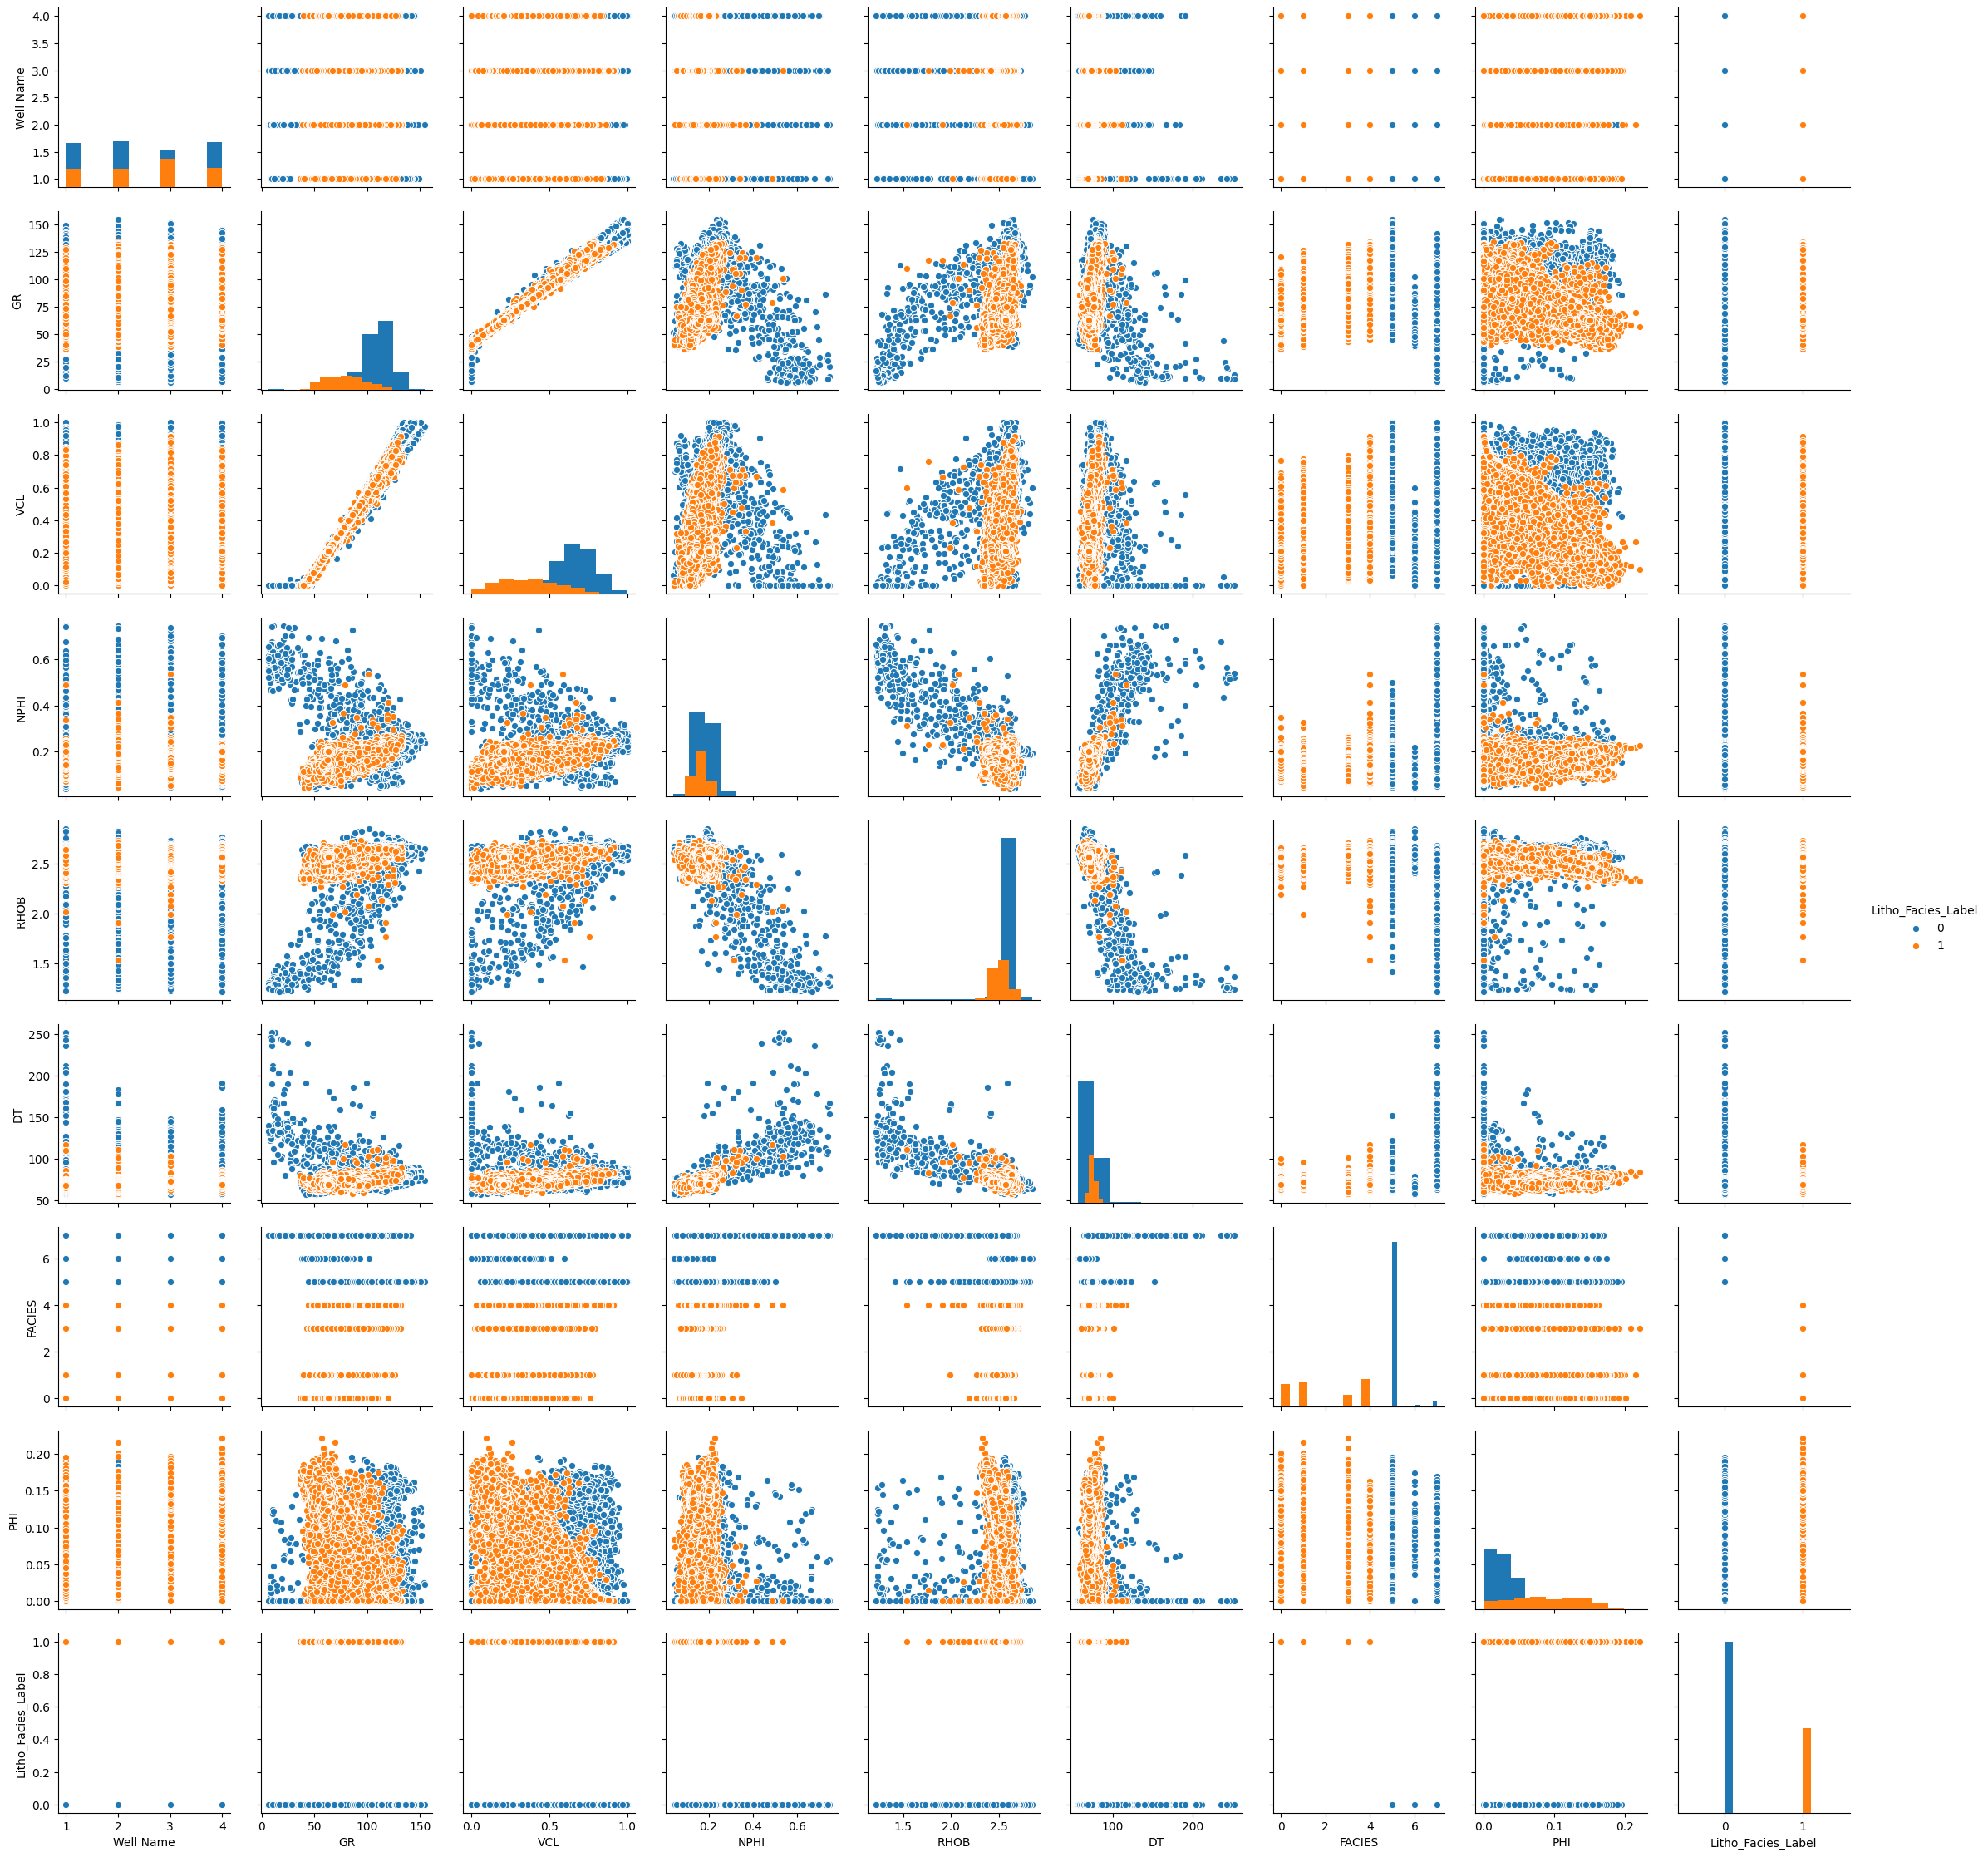

In [7]:
sns.pairplot(data.drop(['Litho_Facies','Depth'], axis = 1) ,hue='Litho_Facies_Label',diag_kind='hist')

#### Plot the heat map chart to preview correlation

<AxesSubplot: >

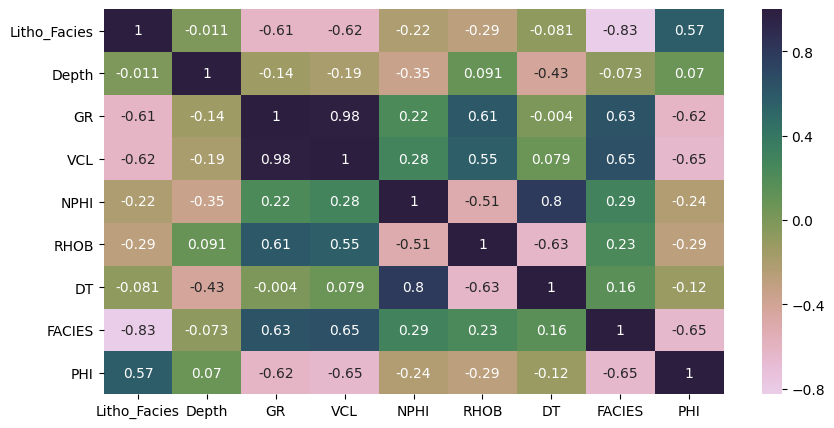

In [8]:
# Preview correlation
plt.figure(figsize=(10,5))
# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)
sns.heatmap(data.corr(),annot=True, cmap = cmap)

In [9]:
#Label of Facies
labels = ['Shale', 'Sand'] 
data['Litho_Facies_Label']=np.select([data['Litho_Facies'] == 0,
                                data['Litho_Facies'] == 1,
                                ]
                                ,labels)

#### Plot the scatter chart to display the correation of Litho_Facies_Label

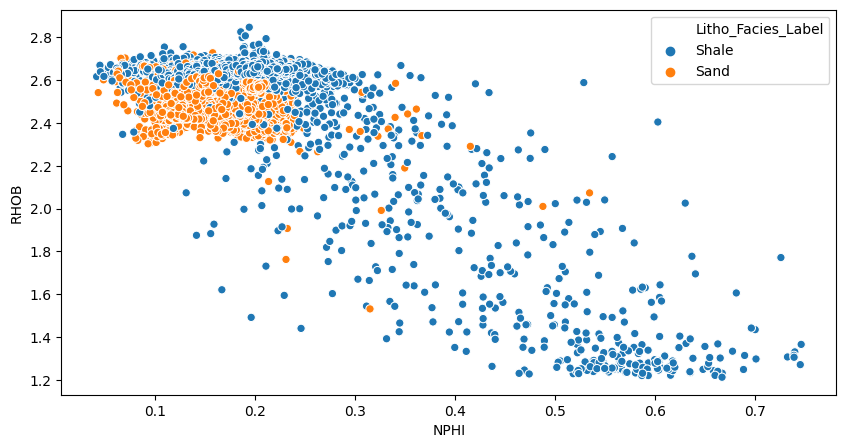

In [10]:
# Scatteer Plot to see the correation btw parameter
plt.figure(figsize =(10,5))

sns.scatterplot(x = 'NPHI', y = 'RHOB',  hue = 'Litho_Facies_Label', data = data, legend='full');

#### Plot the bar chart to display te distribution of Facies

<AxesSubplot: title={'center': 'The Distribution of Facies'}>

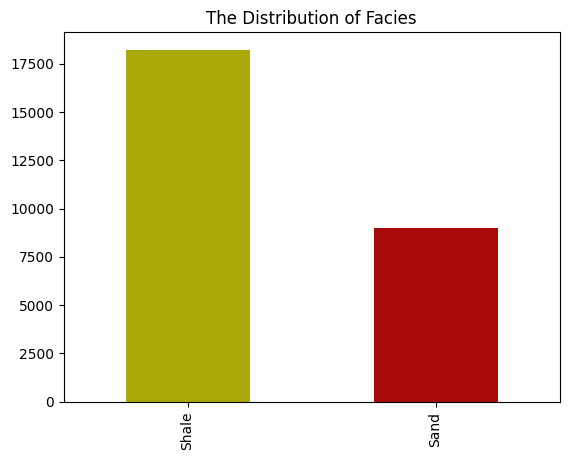

In [11]:
#Bar chart: Distribution of Facies
facies_colors = ['#a9a90a', '#a90a0a'] # modify the custom color that want to display
Facies_dist = data['Litho_Facies_Label'].value_counts().sort_index().sort_values(ascending=False) # sort by descending order

Facies_dist.plot(kind='bar',color=facies_colors,
                   title='The Distribution of Facies')

#### Well logs plot

In [12]:

facies_colors = ['#a9a90a', '#a90a0a'] # modify the custom color that want to display
facies_labels = ['Shale',  'Sand']

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)+1], 'indexed')
    
    ztop=3100; zbot=3800
    
    cluster=np.repeat(np.expand_dims(data['Litho_Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(data.GR, data.Depth, '-g')
    ax[1].plot(data.VCL, data.Depth, '-')
    ax[2].plot(data.NPHI, data.Depth, '-', color='0.5')
    ax[3].plot(data.RHOB, data.Depth, '-', color='r')
    ax[4].plot(data.DT, data.Depth, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                   cmap=cmap_facies,vmin=0,vmax=1)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((18*' ').join([' Sand ', ' Shale ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(0,150)
    ax[1].set_xlabel("VCL")
    ax[1].set_xlim(0,1)
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(0.1,0.3)
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(2,3)
    ax[4].set_xlabel("DT")
    ax[4].set_xlim(60,150)
    ax[5].set_xlabel('Litho_Facies')
    ax[5].set_xlim(0,1)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    #f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

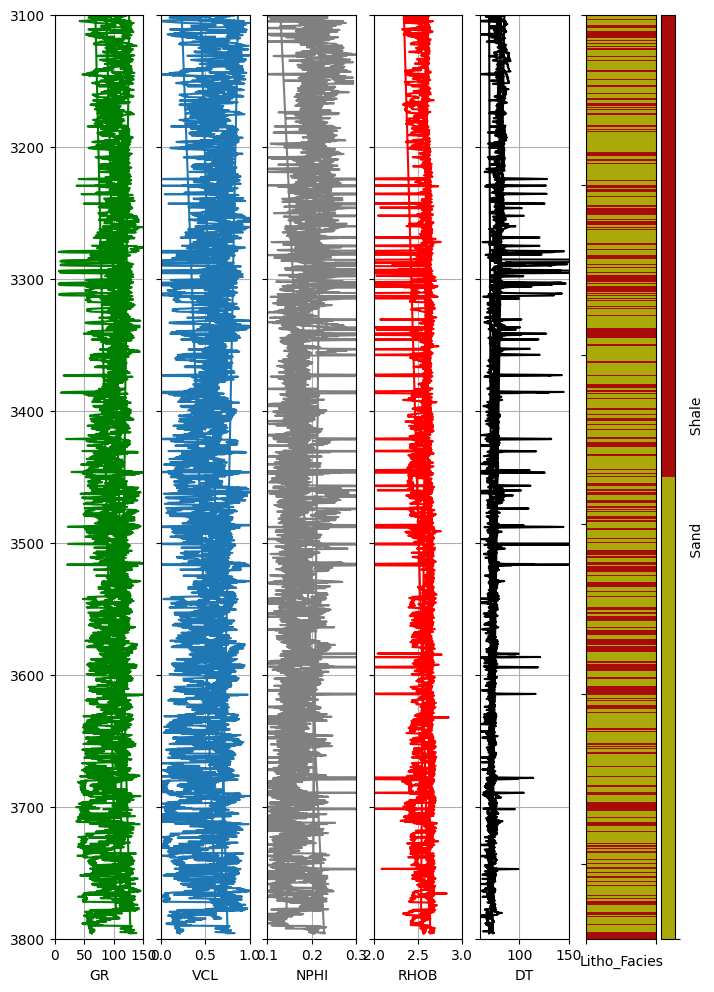

In [13]:
make_facies_log_plot(
    data[data['Well Name'] == '1'],
    facies_colors)

<AxesSubplot: title={'center': 'Distribution of Facies'}>

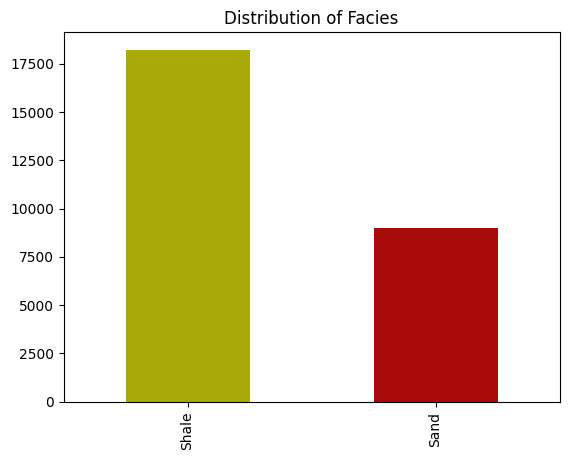

In [14]:
#Bar chart: Distribution of Facies
Facies_dist = data['Litho_Facies_Label'].value_counts().sort_index().sort_values(ascending=False) # sort by descending order

Facies_dist.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Facies')

### 1.3. Explorating data

In [15]:
#Set Index Depth
data.set_index('Depth',inplace=True)

In [16]:
#Group by Well Name
data.groupby("Well Name").count()

,Litho_Facies,Formation,GR,VCL,NPHI,RHOB,DT,FACIES,PHI,Litho_Facies_Label
Well Name,,,,,,,,,,
1,6649,6649,6649,6649,6649,6649,6649,6649,6649,6649
2,6814,6814,6814,6814,6814,6814,6814,6814,6814,6814
3,6857,6857,6857,6857,6857,6857,6857,6857,6857,6857
4,6872,6872,6872,6872,6872,6872,6872,6872,6872,6872


In [17]:
#Data Info (For dtype and NaN analysis)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 27192 entries, 3100.095703 to 3796.052979
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Litho_Facies        27192 non-null  int64   
 1   Formation           27192 non-null  category
 2   Well Name           27192 non-null  category
 3   GR                  27192 non-null  float64 
 4   VCL                 27192 non-null  float64 
 5   NPHI                27192 non-null  float64 
 6   RHOB                27192 non-null  float64 
 7   DT                  27192 non-null  float64 
 8   FACIES              27192 non-null  int64   
 9   PHI                 27192 non-null  float64 
 10  Litho_Facies_Label  27192 non-null  object  
dtypes: category(2), float64(6), int64(2), object(1)
memory usage: 2.1+ MB


#### Remove missing data

In [18]:
# Delete Rows with Missing Data
data = data.dropna()
# Check if any null values
data.isnull().sum()

Litho_Facies          0
Formation             0
Well Name             0
GR                    0
VCL                   0
NPHI                  0
RHOB                  0
DT                    0
FACIES                0
PHI                   0
Litho_Facies_Label    0
dtype: int64

#### Accuracy Evaluation in well "4"

In [19]:
#Using well "2" for accuracy evaluation
test_well = data[data['Well Name'] == '4'] #New data to test
data = data[data['Well Name'] != '4'] 
data.head(10) 

,Litho_Facies,Formation,Well Name,GR,VCL,NPHI,RHOB,DT,FACIES,PHI,Litho_Facies_Label
Depth,,,,,,,,,,,
3100.095703,0,A,1,83.580498,0.417702,0.1982,2.4784,80.315399,5,0.098686,Shale
3100.235352,0,A,1,90.570297,0.495270,0.2048,2.5065,80.236801,5,0.079254,Shale
3100.375000,0,A,1,95.361504,0.548498,0.2028,2.5277,80.528900,5,0.063111,Shale
3100.514648,0,A,1,95.203300,0.546654,0.1846,2.5138,79.506203,5,0.063171,Shale
3100.654297,0,A,1,92.073097,0.511828,0.1661,2.5249,78.292503,5,0.056550,Shale
3100.793701,0,A,1,87.148804,0.457165,0.1593,2.5481,76.769699,5,0.052213,Shale
3100.933350,0,A,1,84.778297,0.430880,0.1544,2.5719,75.580200,5,0.045494,Shale
3101.072998,0,A,1,83.430603,0.415948,0.1518,2.5788,73.989700,5,0.044303,Shale
3101.212646,0,A,1,86.701302,0.452291,0.1434,2.5733,74.265999,5,0.037151,Shale


## <a id='meth'></a>
## Methodology

Data Processing and Model prepration

In [20]:
X = data.drop(['Litho_Facies','FACIES','Formation','Well Name','Litho_Facies_Label'], axis = 1) #Features: Feature vector
y = data['Litho_Facies'] #Target: Facies

In [21]:
X

,GR,VCL,NPHI,RHOB,DT,PHI
Depth,,,,,,
3100.095703,83.580498,0.417702,0.1982,2.4784,80.315399,0.098686
3100.235352,90.570297,0.495270,0.2048,2.5065,80.236801,0.079254
3100.375000,95.361504,0.548498,0.2028,2.5277,80.528900,0.063111
3100.514648,95.203300,0.546654,0.1846,2.5138,79.506203,0.063171
3100.654297,92.073097,0.511828,0.1661,2.5249,78.292503,0.056550
...,...,...,...,...,...,...
3795.709473,62.953300,0.211100,0.2028,2.5632,69.497299,0.150800
3795.795166,62.953300,0.211100,0.2056,2.5599,69.582298,0.153600
3795.881104,62.953300,0.211100,0.2058,2.5694,69.496300,0.149800


#### Data Split (Test/Train)

Split the datasets into training and testing sets with the ratio 70:30

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)
print('Dimensions of X_train:',X_train.shape)
print('Dimensions of X_test:',X_test.shape)

Dimensions of X_train: (19034, 6)
Dimensions of X_test: (8158, 6)


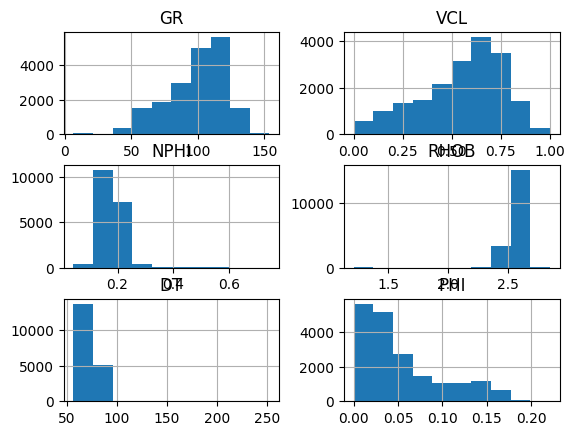

<Figure size 640x480 with 0 Axes>

In [23]:
# show distribution of training set
X_train.hist()
plt.show()
plt.tight_layout()

In [24]:
X_train.head()

,GR,VCL,NPHI,RHOB,DT,PHI
Depth,,,,,,
3126.061523,122.393700,0.832200,0.233400,2.602000,82.902901,0.058906
3115.172363,59.562099,0.150785,0.125400,2.572000,66.842400,0.000128
3441.311768,57.348801,0.130000,0.178483,2.424751,78.029251,0.163600
3305.095215,118.935204,0.778300,0.180099,2.625682,76.137108,0.011300
3365.217285,95.808098,0.527000,0.164500,2.584700,73.643097,0.052400


In [25]:
y_train.head()

Depth
3126.061523    0
3115.172363    0
3441.311768    1
3305.095215    0
3365.217285    0
Name: Litho_Facies, dtype: int64

In [26]:
y_test.head()

Depth
3555.175537    1
3710.970703    0
3599.113037    1
3122.152588    0
3252.736084    1
Name: Litho_Facies, dtype: int64

## 3. Data Preprocessing

### 3.1. Feature Transform: Robust Scaler

##### You can find more information about Robust Scaler in this link (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

#### Apply the Robust Scaler model to extract the feature for tranformation

In [27]:
# Robust Scaler
rscaler = RobustScaler() #instantiate
rscaler.fit(X_train) 

RobustScaler()

#### Transform the train dataset to standardized data

In [28]:
# transform the train dataset to standardized data
X_train_scaled = rscaler.transform(X_train) 

# Original training dataset
print("Original median : %s " % rscaler.center_)
print("Original IQR : %s " % rscaler.scale_)

#Scaled training dataset
print("Scaled median : %s " % np.median(X_train_scaled,axis=0))
print("Scaled IQR : %s " % (np.percentile(X_train_scaled, 75,axis=0)-np.percentile(X_train_scaled, 25,axis=0)))

Original median : [1.03786499e+02 5.96266806e-01 1.74799994e-01 2.60610008e+00
 7.37088013e+01 3.78564315e-02] 
Original IQR : [29.90369985  0.2905762   0.04819913  0.08667499  5.45235062  0.05759593] 
Scaled median : [ 2.37610318e-16 -1.91036423e-16  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.02409832e-17] 
Scaled IQR : [1. 1. 1. 1. 1. 1.] 


#### Scale the test data using the parameters learnt from the training dataset

In [29]:
#Scale the test data using the parameters learnt from the training dataset
X_test_scaled  = rscaler.transform(X_test)

print("Median of scaled test data: %s" % np.median(X_test_scaled,axis=0))
print("IQR of scaled test data: %s " % (np.percentile(X_test_scaled, 75,axis=0)-np.percentile(X_test_scaled, 25,axis=0)))

Median of scaled test data: [0.01334788 0.00734124 0.00829903 0.00692082 0.00392569 0.00301928]
IQR of scaled test data: [0.97921923 0.96995344 1.00562543 0.94260004 0.98934024 0.94808258] 


#### Plot the chart to display the histogram of training data distribution

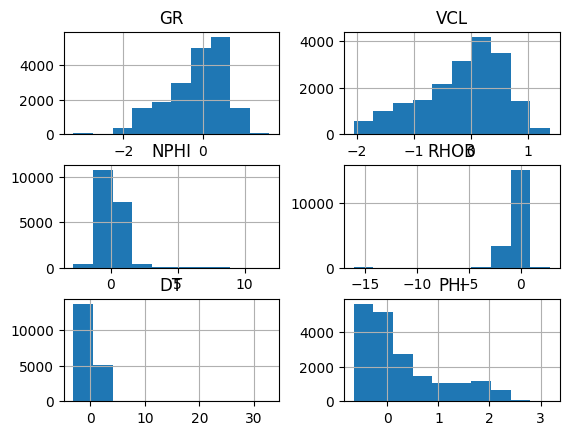

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [30]:
pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns).hist()
plt.show()
plt.tight_layout

#### Create two dataframes for X train and X test

In [31]:
# create two dataframes for X train and X test
X_train=pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_test.columns)
X_test=pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

In [32]:
X_train

,GR,VCL,NPHI,RHOB,DT,PHI
Depth,,,,,,
3126.061523,0.622237,0.811949,1.215790,-0.047304,1.686263,0.365471
3115.172363,-1.478894,-1.533097,-1.024915,-0.393424,-1.259347,-0.655057
3441.311768,-1.552908,-1.604628,0.076411,-2.092288,0.792401,2.183202
3305.095215,0.506583,0.626456,0.109948,0.225919,0.445369,-0.461082
3365.217285,-0.266803,-0.238377,-0.213697,-0.246899,-0.012051,0.252510
...,...,...,...,...,...,...
3363.113770,0.214820,0.310188,0.267208,0.180018,0.188589,0.099722
3526.002686,0.262138,0.316151,0.105811,0.447649,-0.409494,-0.280755
3740.788574,0.684511,0.722291,0.643165,0.414190,0.424973,-0.539421


### 3.2. Outlier Detection: Isolation Forest

#### Training model

In [33]:
# Isolation Forest
iforest = IsolationForest(n_estimators=200, contamination=0.08)
# Start training the model
iforest = iforest.fit(X_train) 

#### Predicting model

In [34]:
X_train_predict = iforest.predict(X_train) 
X_train['Predict']=X_train_predict
X_train['Predict'] = X_train['Predict'].astype('category')
X_train

,GR,VCL,NPHI,RHOB,DT,PHI,Predict
Depth,,,,,,,
3126.061523,0.622237,0.811949,1.215790,-0.047304,1.686263,0.365471,1
3115.172363,-1.478894,-1.533097,-1.024915,-0.393424,-1.259347,-0.655057,-1
3441.311768,-1.552908,-1.604628,0.076411,-2.092288,0.792401,2.183202,1
3305.095215,0.506583,0.626456,0.109948,0.225919,0.445369,-0.461082,1
3365.217285,-0.266803,-0.238377,-0.213697,-0.246899,-0.012051,0.252510,1
...,...,...,...,...,...,...,...
3363.113770,0.214820,0.310188,0.267208,0.180018,0.188589,0.099722,1
3526.002686,0.262138,0.316151,0.105811,0.447649,-0.409494,-0.280755,1
3740.788574,0.684511,0.722291,0.643165,0.414190,0.424973,-0.539421,1


In [35]:
X_train['y_train']=y_train
X_train = X_train[X_train['Predict'] == 1]

y_train=X_train['y_train']
X_train = X_train.drop(['Predict','y_train'], axis = 1)
X_train.head()

,GR,VCL,NPHI,RHOB,DT,PHI
Depth,,,,,,
3126.061523,0.622237,0.811949,1.215790,-0.047304,1.686263,0.365471
3441.311768,-1.552908,-1.604628,0.076411,-2.092288,0.792401,2.183202
3305.095215,0.506583,0.626456,0.109948,0.225919,0.445369,-0.461082
3365.217285,-0.266803,-0.238377,-0.213697,-0.246899,-0.012051,0.252510
3395.796631,0.461033,0.481916,0.219921,0.169598,0.517887,-0.303084


In [36]:
print(len(X_train))
print(len(y_train))

17511
17511


In [37]:
y_train.head(5)

Depth
3126.061523    0
3441.311768    1
3305.095215    0
3365.217285    0
3395.796631    0
Name: y_train, dtype: int64

## 4. Models

### 4.5 Multi-Layer Perceptron ( A Neural Network Implementation in Sklearn)
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips

#### Tuning Hyperparameters

In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV 

parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1400], 'alpha': 10.0 ** -np.arange(1, 2), 'hidden_layer_sizes':[10,20]}
MLPCla = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, refit=True, verbose=3)

In [39]:
MLPCla.fit(X_train, y_train)
print(MLPCla.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'alpha': 0.1, 'hidden_layer_sizes': 20, 'max_iter': 1000, 'solver': 'lbfgs'}


#### Applying Model

In [40]:
MLPCla = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000)
MLPCla.fit(X_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=(10,), max_iter=1000,
              solver='lbfgs')

In [41]:
#Performance (Accuracy)
print('Accuracy (generalization)',MLPCla.score(X_test,y_test)) #Accuracy (generalization)  
print('Accuracy (memorization)',MLPCla.score(X_train,y_train)) #Accuracy (memorization)

#Comparing other metrics (f1_score)
print('F1_score (generalization)',f1_score(y_test,MLPCla.predict(X_test),average="weighted")) #F1_score (generalization)  
print('F1_score (memorization)',f1_score(y_train,MLPCla.predict(X_train),average="weighted")) #F1_score (memorization) 

Accuracy (generalization) 0.8696984555038
Accuracy (memorization) 0.8874421792016447
F1_score (generalization) 0.8689624411612631
F1_score (memorization) 0.8856325968841832


### Observations: 
- After applying tuning method in hyperparameters, we could improve the metrics contain accuracy and F1_score
- For more information about comparation between Accuracy and F1_score, you can follow this link (https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2)

## 5. Deployment (Predict targets for new dataset)

In [42]:
test_well = pd.read_csv('Test_well_4.csv')
test_well.head()


,Litho_Facies,Formation,Well Name,Depth,GR,VCL,NPHI,RHOB,DT,FACIES,PHIE
0,1,A,4,3100.072754,68.623596,0.2317,0.2013,2.3407,81.306198,3,0.1817
1,1,A,4,3100.202148,65.348801,0.1949,0.1858,2.3346,80.998299,3,0.1836
2,1,A,4,3100.331543,67.949402,0.2242,0.1912,2.3285,81.571404,3,0.1845
3,1,A,4,3100.460693,68.708702,0.2327,0.2007,2.3377,80.729202,3,0.1826
4,1,A,4,3100.590088,62.979198,0.1683,0.2009,2.3591,80.173500,3,0.1817


In [43]:
X = test_well.drop(['Litho_Facies','Formation','Well Name', 'FACIES','Depth'], axis = 1) #Features: Feature vector
y_test = test_well['Litho_Facies'] #Target: Litho_Facies
X.head()

,GR,VCL,NPHI,RHOB,DT,PHIE
0,68.623596,0.2317,0.2013,2.3407,81.306198,0.1817
1,65.348801,0.1949,0.1858,2.3346,80.998299,0.1836
2,67.949402,0.2242,0.1912,2.3285,81.571404,0.1845
3,68.708702,0.2327,0.2007,2.3377,80.729202,0.1826
4,62.979198,0.1683,0.2009,2.3591,80.173500,0.1817


In [44]:
y_test

0       1
1       1
2       1
3       1
4       1
       ..
6867    1
6868    1
6869    1
6870    1
6871    1
Name: Litho_Facies, Length: 6872, dtype: int64

In [45]:
X.to_csv('Test.csv', index=False) 

In [46]:
X=pd.DataFrame(X,index=X.index, columns=X.columns)
X.head()

,GR,VCL,NPHI,RHOB,DT,PHIE
0,68.623596,0.2317,0.2013,2.3407,81.306198,0.1817
1,65.348801,0.1949,0.1858,2.3346,80.998299,0.1836
2,67.949402,0.2242,0.1912,2.3285,81.571404,0.1845
3,68.708702,0.2327,0.2007,2.3377,80.729202,0.1826
4,62.979198,0.1683,0.2009,2.3591,80.173500,0.1817


In [47]:
#Scaling
X_test = rscaler.transform(X)
X_test=pd.DataFrame(X_test,index=X.index, columns=X.columns)
X_test.head()

,GR,VCL,NPHI,RHOB,DT,PHIE
0,-1.175871,-1.254634,0.549803,-3.062016,1.393417,2.497461
1,-1.285383,-1.381279,0.228220,-3.132393,1.336946,2.530449
2,-1.198417,-1.280445,0.340255,-3.202770,1.442057,2.546075
3,-1.173025,-1.251193,0.537354,-3.096628,1.287592,2.513087
4,-1.364624,-1.472821,0.541504,-2.849726,1.185672,2.497461


In [48]:
def compare_facies_plot(logs, compare, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    print ('cmap_facies:', cmap_facies)
    ztop=3100; zbot=3800
    
    cluster1 = np.repeat(np.expand_dims(test_well['Litho_Facies'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(test_well[compare].values,1), 100, 1)
    f, ax = plt.subplots(nrows=1, ncols=7, figsize=(9, 12))
    ax[0].plot(test_well.GR, test_well.Depth, '-g')
    ax[1].plot(test_well.VCL, test_well.Depth, '-')
    ax[2].plot(test_well.NPHI, test_well.Depth, '-', color='0.5')
    ax[3].plot(test_well.RHOB, test_well.Depth, '-', color='r')
    ax[4].plot(test_well.DT, test_well.Depth, '-', color='black')
    im1 = ax[5].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=1)
    im2 = ax[6].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=1)
    
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join([' Sand ',' Shale ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(0,150)
    ax[1].set_xlabel("VCL")
    ax[1].set_xlim(0,1)
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(0.1,0.3)
    ax[3].set_xlabel("RHOB")
    ax[3].set_xlim(2,3)
    ax[4].set_xlabel("DT")
    ax[4].set_xlim(60,150)
    ax[5].set_xlabel('Litho_Facies')
    ax[5].set_xlim(0,1)
    ax[6].set_xlabel(compare)
    ax[6].set_xlim(0,1)
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    ax[6].set_xticklabels([]) 
   

### 5.5.  Multi-Layer Perceptron (Sklearn Supervised Neural Network Models)

#### Predicting model

In [50]:
y_pred=MLPCla.predict(X_test)
test_well['Prediction'] = y_pred
test_well.tail(100)

,Litho_Facies,Formation,Well Name,Depth,GR,VCL,NPHI,RHOB,DT,FACIES,PHIE,Prediction
6772,1,A,4,3787.549805,61.623001,0.1983,0.1272,2.4344,73.406998,1,0.1293,1
6773,1,A,4,3787.635498,61.014099,0.1924,0.1229,2.4339,72.924004,1,0.1283,1
6774,1,A,4,3787.721680,60.157799,0.1842,0.1265,2.4399,72.998199,1,0.1282,1
6775,1,A,4,3787.807373,64.576897,0.2267,0.1229,2.4427,72.774200,1,0.1216,1
6776,1,A,4,3787.893311,64.138496,0.2225,0.1229,2.4400,72.612503,1,0.1231,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6867,1,A,4,3795.709473,62.953300,0.2111,0.2028,2.5632,69.497299,0,0.1508,1
6868,1,A,4,3795.795166,62.953300,0.2111,0.2056,2.5599,69.582298,0,0.1536,1
6869,1,A,4,3795.881104,62.953300,0.2111,0.2058,2.5694,69.496300,0,0.1498,1
6870,1,A,4,3795.967041,62.953300,0.2111,0.2066,2.5688,69.559097,0,0.1500,1


In [51]:
test_well.shape

(6872, 12)

In [52]:
test_well.query('Prediction == 1 ').head()

,Litho_Facies,Formation,Well Name,Depth,GR,VCL,NPHI,RHOB,DT,FACIES,PHIE,Prediction
0,1,A,4,3100.072754,68.623596,0.2317,0.2013,2.3407,81.306198,3,0.1817,1
1,1,A,4,3100.202148,65.348801,0.1949,0.1858,2.3346,80.998299,3,0.1836,1
2,1,A,4,3100.331543,67.949402,0.2242,0.1912,2.3285,81.571404,3,0.1845,1
3,1,A,4,3100.460693,68.708702,0.2327,0.2007,2.3377,80.729202,3,0.1826,1
4,1,A,4,3100.590088,62.979198,0.1683,0.2009,2.3591,80.173500,3,0.1817,1


## <a id='res'></a>
## Result

cmap_facies: <matplotlib.colors.ListedColormap object at 0x000001F1D11DBB80>


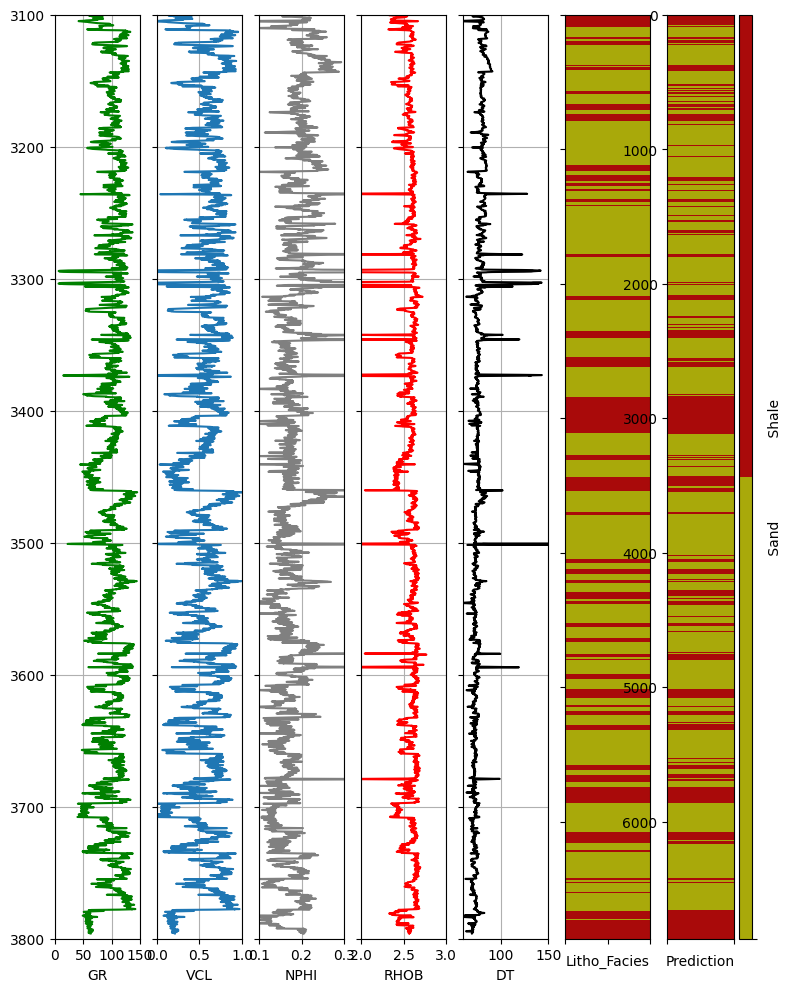

In [53]:
compare_facies_plot(test_well,'Prediction', facies_colors)

In [54]:
target_names = ['Shale', 'Sand']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Shale       0.93      0.92      0.93      4826
        Sand       0.83      0.84      0.83      2046

    accuracy                           0.90      6872
   macro avg       0.88      0.88      0.88      6872
weighted avg       0.90      0.90      0.90      6872



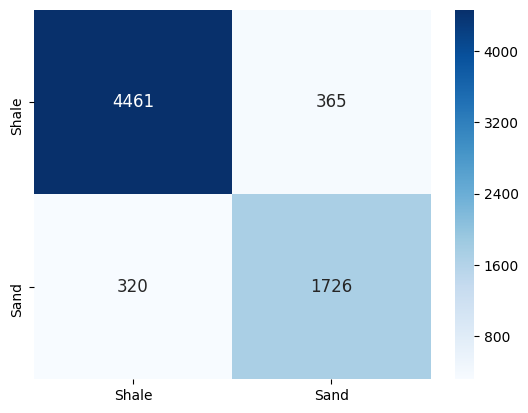

<Figure size 640x480 with 0 Axes>

In [55]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=target_names,yticklabels=target_names)

plt.show()
plt.tight_layout()

In [56]:
y_pred_train=MLPCla.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
y_pred_test=MLPCla.predict(X_train)
y_pred_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

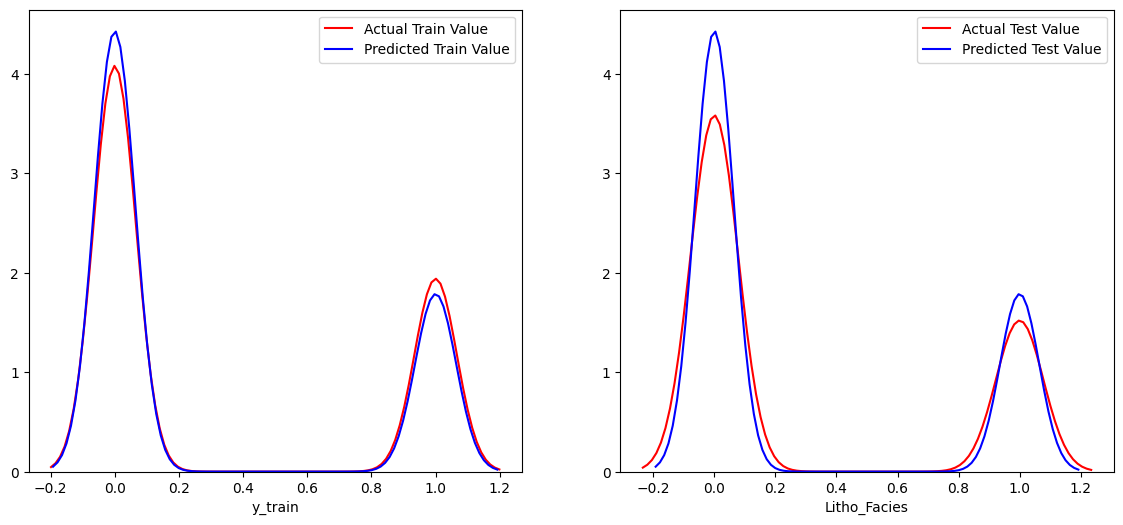

In [58]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist=False, color='r', label='Actual Train Value')
sns.distplot(y_pred_train, hist=False, color='b', label='Predicted Train Value', ax=ax1)
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color='r', label='Actual Test Value')
sns.distplot(y_pred_test, hist=False, color='b', label='Predicted Test Value', ax=ax2)
plt.legend()
plt.show()

## <a id='con'></a>
## Conclusion

- According to the blind test, with the well using the model compare with actual data in test well, we can observe the precision is excellent match with the real data. 
- As a result, it will be a good strategy to apply for predicting facies in other wells with a lack of data base on the ANN model.
- Good match based on train/test/predict values from the density visualization.
- We may focus on two crucial areas in the following phases to enhance the outcomes: integrate more samples of data into the models, fine-tune model parameters, and use more ML approaches to compare

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Project-Final-Data_Scientist.ipynb'])

0